In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../random_results_snakes.csv")
df

,Unnamed: 0,player,mcts_simuls,mcts_rate,player_first,result_from_player,score_diff_from_player,moves
0,0,random,0,1.4,True,1,0,"[3, 0, 2, 3]"
1,1,random,0,1.4,False,-1,0,"[2, 3]"
2,2,random,0,1.4,True,-1,0,"[1, 1]"
3,3,random,0,1.4,False,1,0,"[1, 0]"
4,4,random,0,1.4,True,1,0,"[2, 1, 2]"
...,...,...,...,...,...,...,...,...
895,895,random,500,1.4,False,-1,0,"[3, 3]"
896,896,random,500,1.4,True,-1,0,"[1, 0]"
897,897,random,500,1.4,False,-1,0,"[2, 3]"
898,898,random,500,1.4,True,-1,0,"[0, 0]"


(-1.0, 1.0)

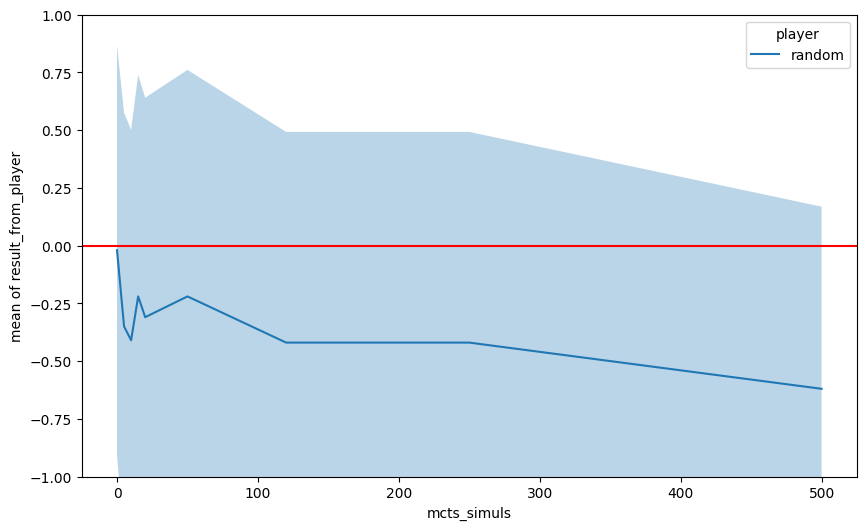

In [4]:
grouped = df.groupby(['player', 'mcts_simuls'])['result_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of result_from_player')
plt.axhline(y=0, color='r', linestyle='-')
ax.set_ylim(-1, 1)

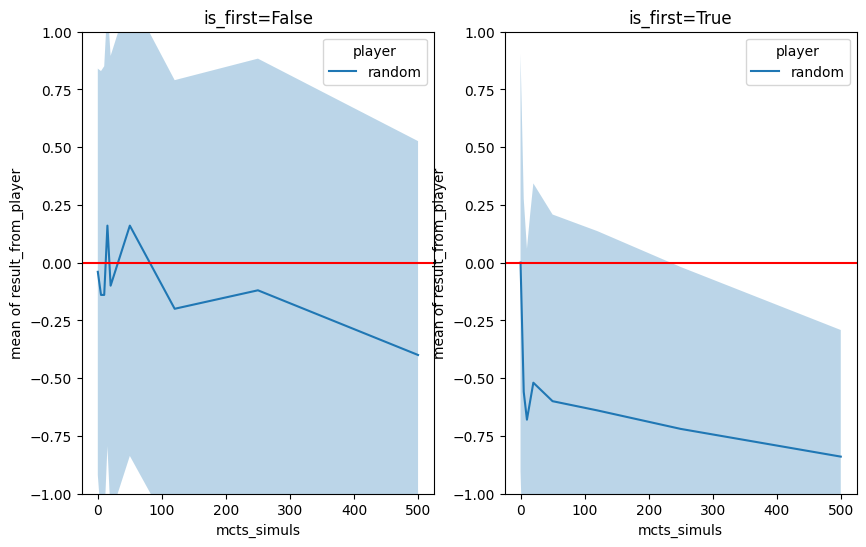

In [5]:
fig, axs = plt.subplots(1, 2)
for is_first in [False, True]:
    grouped = df[df["player_first"] == is_first].groupby(['player', 'mcts_simuls'])['result_from_player'].agg(['mean', 'std'])

    pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
    ax = pivoted.plot.line(figsize=(10, 6), ax=axs[int(is_first)])

    for player in pivoted.columns:
        y = pivoted[player]
        std = grouped.loc[player]["std"]
        ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

    ax.set_xlabel('mcts_simuls')
    ax.set_ylabel('mean of result_from_player')
    ax.axhline(y=0, color='r', linestyle='-')
    ax.set_ylim(-1, 1)
    ax.set_title(f"{is_first=}")

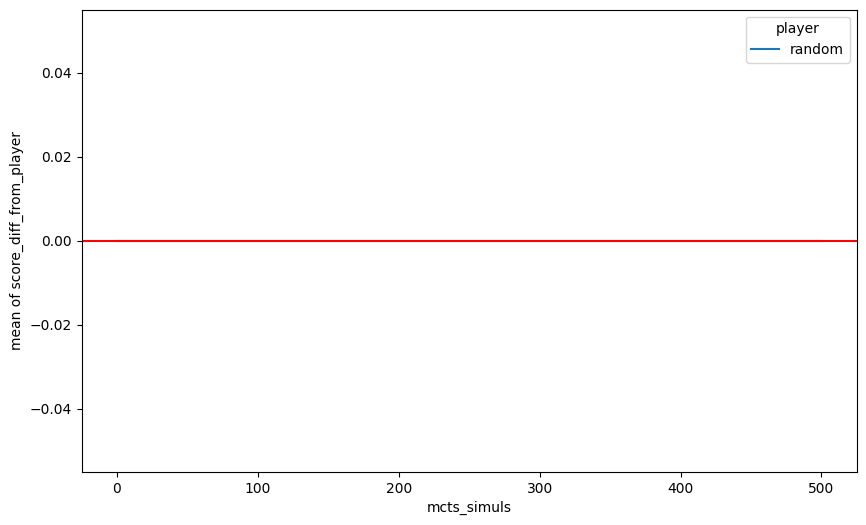

In [6]:
grouped = df.groupby(['player', 'mcts_simuls'])['score_diff_from_player'].agg(['mean', 'std'])

pivoted = grouped.reset_index().pivot(index='mcts_simuls', columns='player', values='mean')
ax = pivoted.plot.line(figsize=(10, 6))

for player in pivoted.columns:
    y = pivoted[player]
    std = grouped.loc[player]["std"]
    ax.fill_between(x=y.index, y1=y-std, y2=y+std, alpha=0.3)

ax.set_xlabel('mcts_simuls')
ax.set_ylabel('mean of score_diff_from_player')
plt.axhline(y=0, color='r', linestyle='-')
# ax.set_ylim(-1, 1)